# Hip hop over time

Billboard has a "R and B / Hip Hop" list, which is a little absurd because the genres aren't *quite* the same. Let's track the changes over the years.

And let's get this out of the way now: **every time you make a vectorizer**, you'll want to ask yourself a few questions.

* What kind of vectorizer do you need? CountVectorizer? TfIdf?
* If TdIfd, do you use use_idf=True or use_idf=False?
* Does your vectorizer require a certain vocabulary?
* Do you care about multiple words ("he said" vs. "she said")? If so, do you need to do something special so it pays attention to that?
* Should you lemmatize/stem when you're processing?

# Reading in the files

## Getting a list of every file we'll want to read in

In [1]:
import glob
filenames = glob.glob('hip-hop/*/*')
filenames[:5]

['hip-hop/1965/a-change-is-gonna-come-sam-cooke',
 'hip-hop/1965/a-lovers-concerto-the-toys',
 'hip-hop/1965/a-woman-can-change-a-man-joe-tex',
 'hip-hop/1965/a-womans-love-carla-thomas',
 'hip-hop/1965/aint-that-peculiar-marvin-gaye']

## Reading in the files using a list comprehension

In [3]:
contents = [open(filename).read() for filename in filenames]
len(contents)

7458

## Use the filenames and the contents to build a dataframe

In [4]:
import pandas as pd

df = pd.DataFrame({
    'lyrics': contents,
    'filename': filenames
})
df.head()

,filename,lyrics
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...
3,hip-hop/1965/a-womans-love-carla-thomas,When I ask you where you've been\nDon't get an...
4,hip-hop/1965/aint-that-peculiar-marvin-gaye,[Verse 1]\nHoney you do me wrong but still I'm...


## Extract the year into a different column

In [5]:
# expand=False just gets rid of a warning
df['year'] = df.filename.str.extract('hip-hop/(\d*)/', expand=False)
df.head(2)

,filename,lyrics,year
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...,1965
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965


## Use the year to create a datetime column

Even though it's a lie, because the billboard charts are weekly. I just didn't save that information!

In [7]:
df['datetime'] = pd.to_datetime(df['year'], format="%Y")
df.head(2)

,filename,lyrics,year,datetime
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...,1965,1965-01-01
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01


## Extract the artist and song name into another column

In [8]:
df['title-artist'] = df.filename.str.extract('hip-hop/\d*/(.*)', expand=False)
df.head(2)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys


## Cleaning up a little more

Let's get rid of things like `"[Verse 1]"` while we're at it.

In [10]:
df['lyrics'] = df['lyrics'].replace("\[.*?\]", "", regex=True).str.strip()
df.head(2)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys


**OKAY!** We did it. We're done. it's clean. Let's get down to business.

# Text analysis

What do you want to do?

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Make a new Count Vectorizer!!!!
# Let's only look for 'gin'
vec = CountVectorizer(vocabulary=['gin', 'patron'])

# Say hey vectorizer, please read our stuff
matrix = vec.fit_transform(df['lyrics'])

# And make a dataframe out of it
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results.head()

,gin,patron
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [20]:
df.head(3)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...,1965,1965-01-01,a-woman-can-change-a-man-joe-tex


In [21]:
df['gin'] = results['gin']
df['patron'] = results['patron']
df.head()

,filename,lyrics,year,datetime,title-artist,gin,patron
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke,0,0
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys,0,0
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...,1965,1965-01-01,a-woman-can-change-a-man-joe-tex,0,0
3,hip-hop/1965/a-womans-love-carla-thomas,When I ask you where you've been\nDon't get an...,1965,1965-01-01,a-womans-love-carla-thomas,0,0
4,hip-hop/1965/aint-that-peculiar-marvin-gaye,Honey you do me wrong but still I'm crazy abou...,1965,1965-01-01,aint-that-peculiar-marvin-gaye,0,0


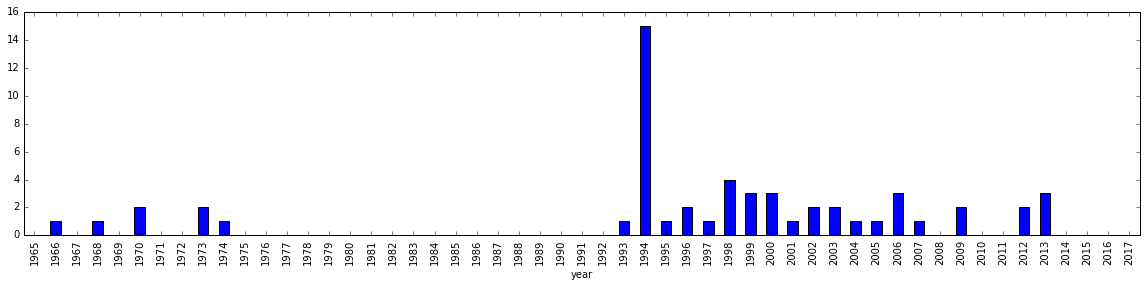

In [26]:
df.groupby('year')['gin'].sum().plot(kind='bar', figsize=(20,4))

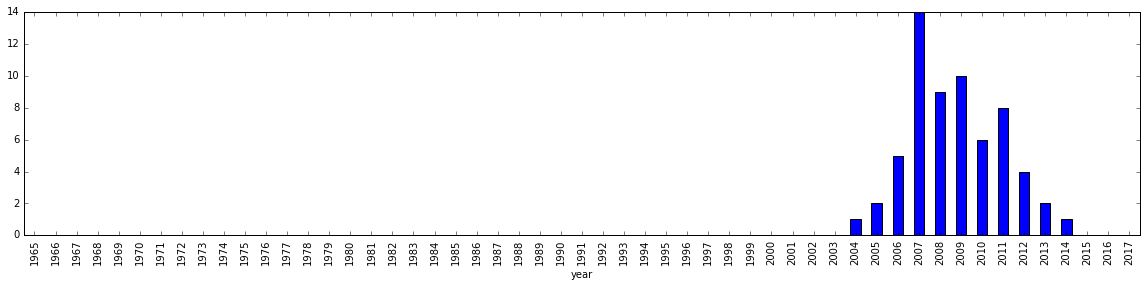

In [27]:
df.groupby('year')['patron'].sum().plot(kind='bar', figsize=(20,4))

# ARE RAPPERS ANGRY?????

## Read in the emotional lexicon

In [28]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head(3)

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0


## Pull out the words you want

We want **angry** and **positive**

In [29]:
angry_words = emolex_df[emolex_df.anger == 1].word
positive_words = emolex_df[emolex_df.positive == 1].word

## Get the percentage of words that we have emotional ratings for

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df['lyrics'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Add up the percent that are angry and the percent that are positive

In [33]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df.head(3)

,filename,lyrics,year,datetime,title-artist,gin,patron,anger,positivity
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke,0,0,0.000000,0.142857
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys,0,0,0.022727,0.409091
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...,1965,1965-01-01,a-woman-can-change-a-man-joe-tex,0,0,0.000000,0.090909


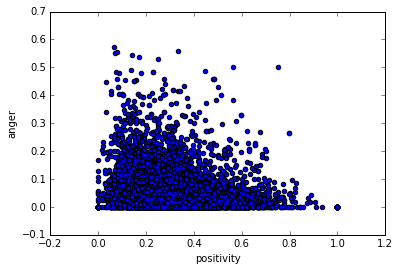

In [34]:
df.plot(x='positivity', y='anger', kind='scatter')

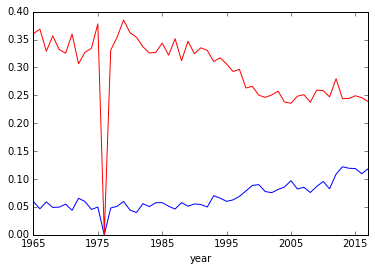

In [40]:
ax = df.groupby('year')['anger'].mean().plot()
df.groupby('year')['positivity'].mean().plot(ax=ax, c='red')